<a href="https://colab.research.google.com/github/TMhdSofyan/Unsupervised_Learning/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/Chapter4_Geologic_DataSet.xlsx')
df.describe()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,157.972603,2.242265,22.438356,0.159863,20.283105,0.063221,9935.125571
std,30.396528,0.019978,7.971895,0.037465,3.187825,0.008410,827.981530
min,66.000000,2.209100,5.000000,0.100000,10.000000,0.032000,8046.000000
25%,139.000000,2.226425,17.000000,0.130000,19.000000,0.057000,9372.250000
50%,155.000000,2.239300,22.000000,0.150000,20.000000,0.065000,9844.500000
75%,178.000000,2.255925,26.000000,0.190000,22.000000,0.070000,10440.000000
max,259.000000,2.319600,49.000000,0.310000,33.000000,0.077000,12474.000000


In [24]:
df.columns

Index(['GR_API', 'Bulk Density, gcc', 'Resistivity, ohm-m',
       'Water Saturation, fraction', 'PhiH, ft', 'TOC, fraction', 'TVD, ft'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GR_API', ylabel='Density'>

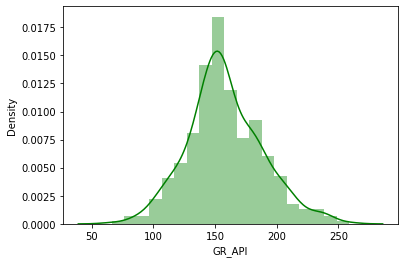

In [21]:
sns.distplot(df['GR_API'],label='Clustering Data',norm_hist=True,color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bulk Density, gcc', ylabel='Density'>

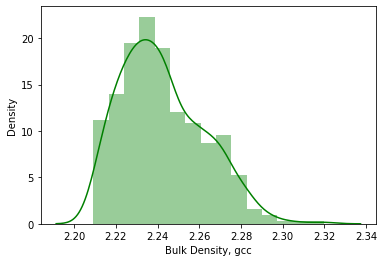

In [27]:
sns.distplot(df['Bulk Density, gcc'],label='Clustering Data',norm_hist=True,color='g')

<AxesSubplot:>

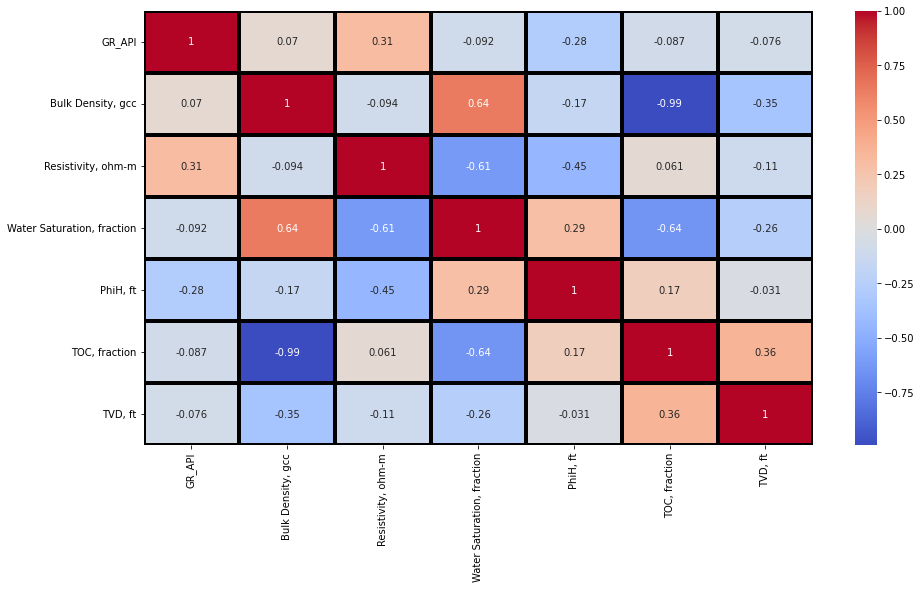

In [29]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=4,linecolor='black')

In [30]:
df.drop(['TOC, fraction'], axis=1, inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, -0.79799783,  0.85324677,
         0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471,  0.27088   , -0.08890975,
        -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362,  1.07253837,  0.22514243,
        -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884,  0.27088   , -0.7170141 ,
        -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362,  1.33975783,  0.5391946 ,
         0.55846969],
       [-0.32845878, -0.45928217, -0.43180297,  0.27088   ,  1.16729895,
        -0.65913177]])

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

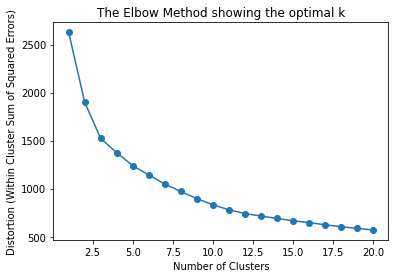

In [32]:
from sklearn.cluster import KMeans

distortions=[]
for i in range (1,21):
  km=KMeans(n_clusters=i,random_state=1000,
  init='k-means++', n_init=1000, max_iter=500)
  km.fit(df_scaled)
  distortions.append(km.inertia_)


plt.plot(range(1,21),distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')

In [39]:
n = 10
kmeans=KMeans(n_clusters=n,random_state=1000,init='k-means++',n_init=1000, max_iter=500)
kmeans=kmeans.fit(df_scaled)
print(kmeans.cluster_centers_)

[[ 9.30273581e-01  1.88836765e+00 -9.28679310e-01  2.10656149e+00
   2.93414638e-01 -7.63433017e-01  6.00000000e+00]
 [-1.16789355e-01 -2.00435715e-01 -8.26974365e-01  6.34298462e-01
   1.95830890e-01 -3.17510119e-01  4.00000000e+00]
 [-8.13762342e-01 -8.46680523e-01  3.55020052e-01 -7.65277084e-01
   3.46917759e-01 -3.70567402e-01  7.00000000e+00]
 [ 8.70768660e-01 -9.78838790e-01  3.80008731e-01 -7.78910730e-01
   2.36358575e-01  6.05107849e-01  2.66453526e-15]
 [-9.53623515e-01 -8.62827588e-01 -2.80154207e-01 -7.42537192e-01
  -1.18780826e-02  1.51891269e+00  3.00000000e+00]
 [-6.30196086e-01  1.18278300e+00 -5.77642604e-01  9.64788592e-01
  -1.64890112e-01 -1.93847858e-01  8.00000000e+00]
 [ 1.92616794e+00 -1.36741531e-01  3.61660400e-01 -6.52241766e-01
  -1.43076904e+00  8.36681234e-01  9.00000000e+00]
 [ 2.90393468e-01  1.47955174e-01  1.23604241e+00 -5.96411225e-01
  -7.00485034e-01 -7.47144247e-01  2.00000000e+00]
 [ 1.49714297e+00  1.42135886e+00  2.61809734e+00 -8.93433355e-0

In [40]:
labels=kmeans.labels_
labels

array([4, 1, 1, 1, 2, 9, 8, 2, 3, 3, 5, 9, 5, 5, 3, 7, 4, 5, 4, 7, 7, 2,
       4, 6, 7, 1, 9, 1, 4, 1, 0, 5, 3, 5, 1, 0, 7, 3, 2, 9, 9, 5, 5, 1,
       7, 9, 6, 7, 4, 5, 7, 7, 2, 2, 2, 6, 4, 2, 3, 5, 1, 2, 4, 9, 1, 3,
       4, 8, 8, 3, 1, 1, 4, 2, 6, 8, 4, 5, 0, 7, 9, 1, 3, 3, 3, 4, 9, 5,
       7, 2, 7, 8, 4, 3, 3, 5, 5, 5, 5, 5, 9, 3, 3, 2, 1, 9, 2, 2, 0, 9,
       9, 6, 2, 2, 2, 7, 4, 6, 3, 7, 9, 5, 1, 3, 1, 7, 1, 7, 7, 3, 2, 7,
       9, 1, 7, 2, 5, 7, 4, 6, 4, 6, 0, 2, 1, 1, 4, 7, 9, 2, 5, 4, 5, 9,
       6, 2, 7, 4, 1, 7, 0, 3, 4, 7, 8, 1, 0, 9, 4, 7, 2, 1, 7, 5, 5, 1,
       4, 2, 4, 3, 4, 2, 0, 7, 5, 9, 9, 5, 1, 1, 5, 1, 4, 2, 1, 0, 0, 6,
       4, 8, 4, 8, 2, 3, 7, 7, 4, 4, 3, 4, 7, 7, 0, 2, 5, 1, 1, 5, 1, 7,
       5, 5, 5, 5, 9, 7, 7, 8, 0, 0, 0, 2, 3, 3, 4, 3, 1, 4, 1, 1, 7, 3,
       7, 8, 7, 0, 1, 1, 5, 1, 4, 6, 8, 7, 3, 3, 5, 1, 1, 5, 1, 1, 1, 1,
       5, 5, 3, 2, 3, 2, 7, 1, 1, 5, 1, 9, 4, 6, 2, 4, 1, 4, 1, 0, 7, 5,
       5, 9, 0, 9, 4, 4, 7, 6, 2, 3, 1, 1, 7, 7, 7,

In [41]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['clusters']=labels
df_scaled

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft",clusters
0,-1.316542,-1.636920,0.070534,-0.797998,0.853247,0.888564,4
1,0.396136,-1.190921,-0.180635,0.270880,-0.088910,-0.003779,1
2,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,1
3,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,1
4,-0.756628,-0.599596,-0.055051,0.003661,1.167299,-0.862267,2
...,...,...,...,...,...,...,...
433,-1.151862,-0.579552,0.196118,-0.530778,0.539195,-0.399167,2
434,-0.559012,0.878715,-0.306219,1.072538,-0.402962,0.182428,5
435,-0.032034,0.968917,-0.306219,0.270880,-0.717014,-1.121022,5
436,-0.526075,0.502873,-1.059724,1.339758,0.539195,0.558470,5


In [43]:
df_scaled['GR_API']=(df_scaled['GR_API']*(df['GR_API'].std())+df['GR_API'].mean())
df_scaled['Bulk Density, gcc']=(df_scaled['Bulk Density, gcc']*(df['Bulk Density, gcc'].std())+df['Bulk Density, gcc'].mean())
df_scaled['Resistivity, ohm-m']=(df_scaled['Resistivity, ohm-m']*(df['Resistivity, ohm-m'].std())+df['Resistivity, ohm-m'].mean())
df_scaled['Water Saturation, fraction']=(df_scaled['Water Saturation, fraction']*(df['Water Saturation, fraction'].std())+df['Water Saturation, fraction'].mean())
df_scaled['PhiH, ft']=(df_scaled['PhiH, ft']*(df['PhiH, ft'].std())+df['PhiH, ft'].mean())
df_scaled['TVD, ft']=(df_scaled['TVD, ft']*(df['TVD, ft'].std())+df['TVD, ft'].mean())

In [46]:
Group_by=df_scaled.groupby(by='clusters').mean()
Group_by

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
clusters,,,,,,
0,5819.316475,2.287815,142.295975,0.238786,21.218460,9303.017133
1,4851.883822,2.286981,148.759438,0.183627,20.907380,9672.233056
2,4207.916395,2.286723,223.876496,0.131192,21.389018,9628.302607
3,5764.336969,2.286670,225.464555,0.130681,21.036575,10436.143694
4,4078.691817,2.286717,183.510466,0.132044,20.245240,11192.757228
5,4377.522236,2.287533,164.604748,0.196009,19.757464,9774.623125
6,6739.471979,2.287007,224.298498,0.135427,15.722063,10627.882179
7,5228.099946,2.287120,279.866446,0.137518,18.050081,9316.503934
8,6343.074830,2.287628,367.697573,0.126390,13.706774,9402.391509


In [48]:
df_scaled.groupby(by='clusters').count()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
clusters,,,,,,
0,23,23,23,23,23,23
1,75,75,75,75,75,75
2,49,49,49,49,49,49
3,56,56,56,56,56,56
4,53,53,53,53,53,53
5,62,62,62,62,62,62
6,22,22,22,22,22,22
7,57,57,57,57,57,57
8,14,14,14,14,14,14
